In [1]:
import cv2
import os
import torch
import numpy as np # linear algebra
from tqdm import tqdm
from scipy import ndimage
from torch import nn, optim
import matplotlib.pyplot as plt
import glob
import torch.nn.functional as F
from sklearn.utils import shuffle #shuffle dataset
from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from torch.utils.data import Dataset, DataLoader #make dataset batches and load them to model
from sklearn.model_selection import train_test_split

In [ ]:
!unzip urdu\ numb.zip -d Dataset


In [58]:
def load_labels(myDir):
    labels=[]
    fileList = glob.glob(myDir)
   
    for fname in fileList:
        curLabel = fname.split("/")
        # print(curLabel[2])
        labels.append(curLabel[2])
    return np.asarray(labels)
        

def load_data(myDir):
    fileList = glob.glob(myDir)
    data=[]   
    for fname in fileList:
      img1 = cv2.imread(fname)
      x = cv2.resize(img1,(32,32), interpolation = cv2.INTER_AREA)
      data.append(x)
    return data

In [112]:

myDir ="Dataset/*/*/*.*"
labelsurdu = load_labels(myDir)
dataurdu = load_data(myDir)
dataurdu = np.array(dataurdu, dtype='float32')/255.
dataurdu.shape


(9874, 32, 32, 3)

In [113]:
from matplotlib import pyplot
import random

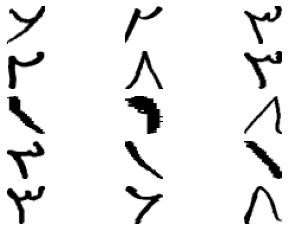

In [98]:

# create and save a plot of generated images
def save_plot(examples, epoch, n=5):
	# scale from [-1,1] to [0,1]
	# examples = (examples + 1) / 2.0
	# plot images
	for i in range(15):
		# define subplot
		pyplot.subplot(n, 3, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i], cmap ="binary")
	# save plot to file
	
	pyplot.savefig("urdu_images.png")
	pyplot.show()
 
save_plot(dataurdu,3)



In [114]:
Xurdu = dataurdu
Yurdu = labelsurdu

In [115]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Yurdu= lb.fit_transform(labelsurdu)

In [116]:
Xurdu = Xurdu.reshape(Xurdu.shape[0],32*32*3)
y = Yurdu

In [117]:
print(Xurdu.shape, y.shape)
y = y.argmax(1)

(9874, 3072) (9874, 10)


In [118]:
featurdu_cols = [ 'pixel'+str(i) for i in range(Xurdu.shape[1]) ]

In [119]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
dfurdu = pd.DataFrame(Xurdu,columns=featurdu_cols)
dfurdu['y'] = labelsurdu
dfurdu['y_new'] = y.astype(float)/10
dfurdu['label'] = dfurdu['y'].apply(lambda i: str(i))

In [120]:
Xurdu, y = None, None

In [121]:
np.random.seed(42)
rndpermurdu = np.random.permutation(dfurdu.shape[0])

In [122]:
pcaurdu = PCA(n_components=3)
pca_resulturdu = pcaurdu.fit_transform(dfurdu[featurdu_cols].values)

dfurdu['pca-one'] = pca_resulturdu[:,0]
dfurdu['pca-two'] = pca_resulturdu[:,1] 
dfurdu['pca-three'] = pca_resulturdu[:,2]


In [123]:
print('Explained variation per principal component: {}'.format(pcaurdu.explained_variance_ratio_))
print(rndpermurdu)
dfurdu.index.max()

Explained variation per principal component: [0.22086358 0.09789973 0.07039133]
[3433  106 7182 ... 5390  860 7270]


9873

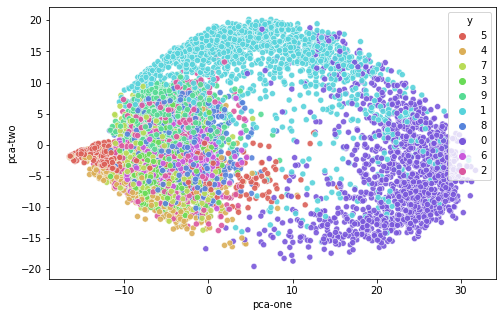

In [124]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="pca-one",y="pca-two",#Selects the columns 
    hue = 'y',
    palette=sns.color_palette("hls", 10),
    data=dfurdu.loc[rndpermurdu,:], 
    legend="full",
    alpha=0.9
)

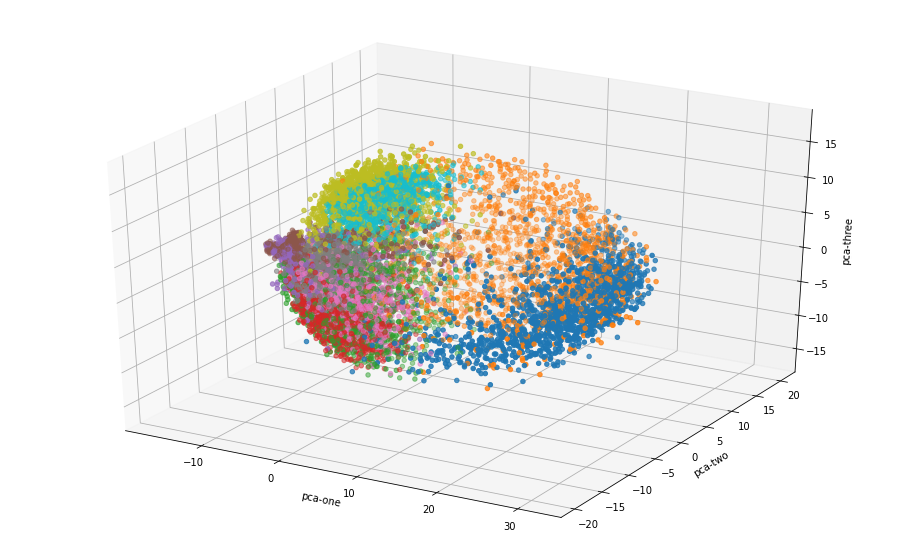

<Figure size 432x288 with 0 Axes>

In [125]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dfurdu.loc[rndpermurdu,:]["pca-one"], 
    ys=dfurdu.loc[rndpermurdu,:]["pca-two"], 
    zs=dfurdu.loc[rndpermurdu,:]["pca-three"], 
    c=dfurdu.loc[rndpermurdu,:]["y_new"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()
plt.savefig('pca3d.png', bbox_inches='tight')

In [126]:
N = 4000
df_subseturdu = dfurdu.loc[rndpermurdu[:N],:].copy()
dataurdu_subset = df_subseturdu[featurdu_cols].values

pcaurdu = PCA(n_components=3)
pca_resulturdu = pcaurdu.fit_transform(dataurdu_subset)

df_subseturdu['pca-one'] = pca_resulturdu[:,0]
df_subseturdu['pca-two'] = pca_resulturdu[:,1] 
df_subseturdu['pca-three'] = pca_resulturdu[:,2]

print('Explained variation per principal component: {}'.format(pcaurdu.explained_variance_ratio_))

Explained variation per principal component: [0.2226063  0.09648096 0.06955793]


In [127]:
time_start = time.time()
tsneurdu = TSNE(n_components=2, verbose=1, perplexity=15, n_iter=500)
tsne_resultsurdu = tsneurdu.fit_transform(dataurdu_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))



[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 4000 samples in 2.163s...
[t-SNE] Computed neighbors for 4000 samples in 131.238s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 4.795585
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.162476
[t-SNE] KL divergence after 500 iterations: 1.375405
t-SNE done! Time elapsed: 150.43661975860596 seconds


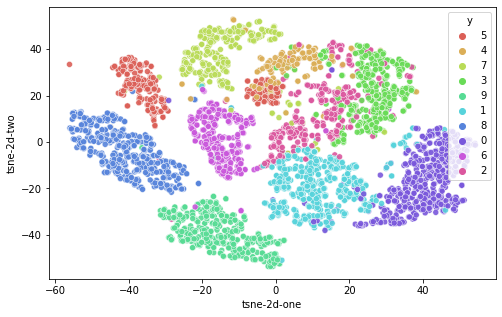

In [129]:
df_subseturdu['tsne-2d-one'] = tsne_resultsurdu[:,0]
df_subseturdu['tsne-2d-two'] = tsne_resultsurdu[:,1]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subseturdu,
    legend="full",
    alpha=0.9
)

In [130]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(dataurdu_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8304582834243774


In [135]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=200, learning_rate=10, n_iter=500)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 51.15172839164734 seconds


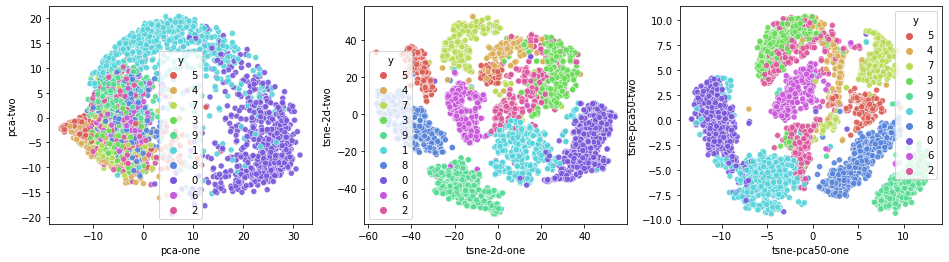

In [136]:
df_subseturdu['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subseturdu['tsne-pca50-two'] = tsne_pca_results[:,1]

plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subseturdu,
    legend="full",
    alpha=0.9,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subseturdu,
    legend="full",
    alpha=0.9,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subseturdu,
    legend="full",
    alpha=0.9,
    ax=ax3
)